# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import ensemble
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.model_selection import GridSearchCV

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Curves), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Las "curvas de aprendizaje" (learning curves) muestran el efecto de agregar más observaciones durante el proceso de entrenamiento de un modelo de aprendizaje de máquina. El efecto se representa graficando alguna métrica rendimiento estadístico (dependiendo la aplicación específica y si el problema es de clasificación o regresión; incluso tambien se puede aplicar a alguna métrica de desempeño de algún modelo no-supervisado) del modelo en términos del training score y del testing score. En el eje horizontal se muestra el número de observaciones en el conjunto de entrenamiento, y en el eje vertical, la métrica de interés implicada por el modelo, tanto sobre la muestra de entrenamiento, como la de testing.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Este artículo se centró en modelar doce métricas de rendimiento extraídas de publicaciones publicadas en la página de Facebook de una empresa mediante el uso de minería de datos a.k.a aprendizaje de máquina. Utilizando información sobre la categoría, total de "me gusta" de la página, tipo, mes, hora, día de la semana y pago de dichas páginas.

También obtuvieron un flujo de decisión basado en la extracción de reglas del modelo que, en opinión de los autores, los administradores de páginas de Facebook pueden utilizar para tomar decisiones informadas sobre las publicaciones, mejorando su impacto y contribuyendo así a la construcción de marca.


### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


1. **'Lifetime Post Consumers'** (variable respuesta): El número de personas que hicieron clic en cualquier parte de una publicación.
2. **'Page total likes'**: Número de personas a las que les ha gustado la página de la empresa.
3. **'Type'**: Tipo de contenido (Link, Photo, Status, Video)
4. **'Category'**: Caracterización del manual de contenidos. Acción (ofertas especiales y concursos), producto (publicidad directa, contenido de marca explícito) e inspiración (contenido relacionado con la marca no explícito).
5. **'Post Month'**: Mes en que se publicó el post. (January, February, March, ..., December)
6. **'Post Weekday'**: Día de la semana en el que se publicó el post (Sunday, Monday, ..., Saturday).
7. **'Post Hour'**: Hora de día en el que se publicó el post (0, 1, 2, 3, 4, ..., 23)
8. **'Paid'**: Si la empresa pagó a Facebook por publicidad (yes, no)


### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [2]:
# Cargamos los datos:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)

print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [3]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [4]:
Xtrain.describe().T   # veamos alguna descripción como datos numéricos

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [5]:
ytrain.describe().T   # lo mismo para la variable de salida

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


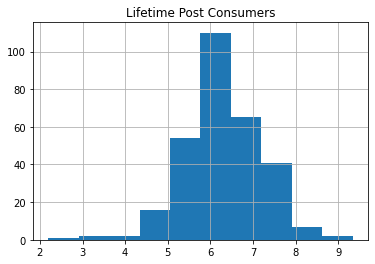

In [6]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [7]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [8]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
# Como solo tenemos una numérica, la podemos dejar sin escalar:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


# Ajustamos en Train y transformamos en Val y Test:
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
XtestT  =  XtrainFit.transform(Xtest)

In [9]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1007.420
Desv-Est y-logaritmo: 0.906


## **Ejercicio 3**


In [10]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor()

# +++++++++++++ Termina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)


Veamos los tamaños de muestras, scores de entrenamiento y de prueba resultantes:

In [11]:
train_sizes

array([ 24,  48,  72,  96, 120, 144, 168, 192, 216, 240])

In [12]:
train_scores

array([[-0.15463785, -0.11287896, -0.10563884, -0.10276716, -0.109728  ],
       [-0.13499084, -0.1263063 , -0.12079263, -0.12406002, -0.11815383],
       [-0.11093796, -0.09651933, -0.08750567, -0.08594725, -0.09269301],
       [-0.08490626, -0.08212464, -0.11156345, -0.11264684, -0.09924762],
       [-0.08286405, -0.08001544, -0.11049062, -0.10445129, -0.10787565],
       [-0.06476105, -0.07224463, -0.09413864, -0.1024459 , -0.09315433],
       [-0.08970706, -0.09252783, -0.09993582, -0.07993254, -0.08548375],
       [-0.0941171 , -0.08438876, -0.10379665, -0.07892723, -0.08069371],
       [-0.07964337, -0.07688865, -0.09177361, -0.07356535, -0.08930871],
       [-0.07638559, -0.07589451, -0.09758963, -0.08977842, -0.08692688]])

In [13]:
val_scores

array([[-1.98859966, -1.02288596, -0.64606357, -1.19726584, -0.6496656 ],
       [-0.67964908, -0.69324375, -0.47243341, -1.06297343, -0.52085673],
       [-0.92788704, -0.76144999, -0.43235027, -0.98208055, -0.4932223 ],
       [-0.74162893, -0.71775366, -0.43344134, -1.13244013, -0.73532276],
       [-0.71310731, -0.59303236, -0.3463004 , -1.02945257, -0.6534322 ],
       [-0.66537471, -0.65898064, -0.34711816, -0.99736015, -0.63915342],
       [-0.68434526, -0.60727604, -0.42816611, -0.96266751, -0.66755668],
       [-0.64795155, -0.66070327, -0.40492456, -1.00210843, -0.57960732],
       [-0.59135032, -0.67565376, -0.44044622, -0.98590495, -0.66806779],
       [-0.65117611, -0.79133736, -0.4374651 , -0.82572591, -0.50684759]])

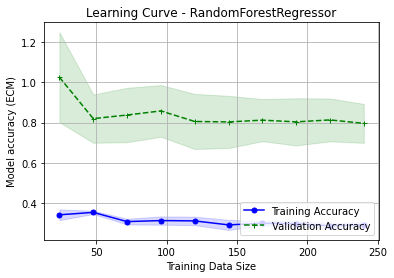

In [14]:
# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - RandomForestRegressor')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy (ECM)')
plt.grid()
plt.legend(loc='lower right')

plt.show()

Se puede observar que a medida que crece el número de observaciones en la muestra de entrenamiento, los errores cuadráticos medios de entrenamiento y prueba NO se acercan. Esto da un indicio de que aumentar los datos de entrenamiento, no tendrá efecto en la predicción sobre observaciones nunca antes observadas. Es decir, con las especificaciones por default del modelo `RandomForestRegressor` se estará sub-entrenando. Es decir, sólo agregando más datos de entrenamiento no servirá. Se tiene que considerar la complejidad del modelo.

Para el `RandomForestRegressor`, se verá el efecto de `min_samples_split` y el `ccp_alpha`. Dichos parámetros representan lo siguiente:

+ `min_samples_split`: El mínimo nùmero de observaciones que se requieren para dividir un nodo interno
+ `ccp_alpha`: parámetro de complejidad que se usa para el Minimal Cost-Complexity Pruning

Empecemos con el `min_samples_split`

In [15]:
rango_min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40]

train_scores2, val_scores2 = validation_curve(estimator = mipipe,
                                              X = XtrainT,
                                              y = np.ravel(ytrainlog),
                                              cv = 5,
                                              param_name = "m__min_samples_split",
                                              param_range = rango_min_samples_split,
                                              scoring = 'neg_mean_squared_error',  # error MSE
                                              n_jobs = -1)

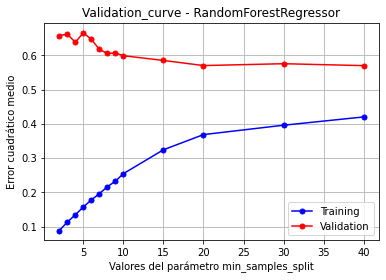

In [16]:
train_mean2 = np.mean(-train_scores2, axis = 1)
valid_mean2 = np.mean(-val_scores2, axis = 1)

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_min_samples_split , train_mean2, color = "blue", marker = 'o', markersize = 5, label = "Training")

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_min_samples_split , valid_mean2, color = "red", marker = 'o', markersize = 5, label = "Validation")

plt.title("Validation_curve - RandomForestRegressor")
plt.xlabel("Valores del parámetro min_samples_split")
plt.ylabel("Error cuadrático medio")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Ahora veamos como se comporta el error cuadrático medio en función del parámetro `ccp_alpha`.

In [17]:
rango_alpha = [0.0001, 0.001, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2]

train_scores3, val_scores3 = validation_curve(estimator = mipipe,
                                              X = XtrainT,
                                              y = np.ravel(ytrainlog),
                                              cv = 5,
                                              param_name = "m__ccp_alpha",
                                              param_range = rango_alpha,
                                              scoring = 'neg_mean_squared_error',  # error MSE
                                              n_jobs = -1)

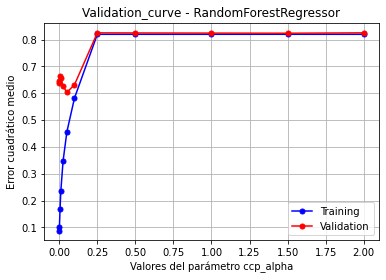

In [18]:
train_mean3 = np.mean(-train_scores3, axis = 1)
valid_mean3 = np.mean(-val_scores3, axis = 1)

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_alpha , train_mean3, color = "blue", marker = 'o', markersize = 5, label = "Training")

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_alpha , valid_mean3, color = "red", marker = 'o', markersize = 5, label = "Validation")

plt.title("Validation_curve - RandomForestRegressor")
plt.xlabel("Valores del parámetro ccp_alpha")
plt.ylabel("Error cuadrático medio")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

In [19]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de los nejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(ccp_alpha = 0.01, min_samples_split = 40)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

el_pipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
el_pipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = el_pipe.predict(Xtest)

print('Error RSME(Test) de Random Forest con tuning: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest con tuning: 0.700


Que si se compara con el modelo con los hiperparámetros por default se tiene los siguiente:

In [20]:
modelo_RF_sin_hiper = RandomForestRegressor()

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', modelo_RF_sin_hiper)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest default: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest default: 0.711


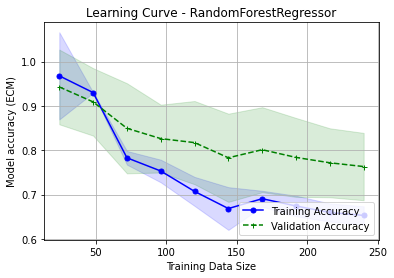

In [21]:
train_sizes, train_scores, val_scores = learning_curve(estimator=el_pipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - RandomForestRegressor')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy (ECM)')
plt.grid()
plt.legend(loc='lower right')

plt.show()

## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [22]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias para
# responder el Ejercicio 4.

### a. Extreme Gradient Boost XGBoost

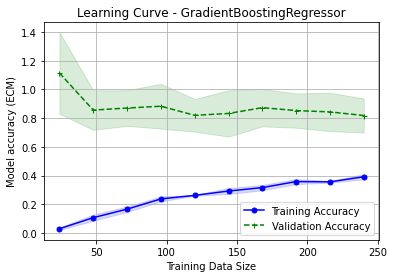

In [23]:
modelo_GB = ensemble.GradientBoostingRegressor()

mipipe = Pipeline(steps=[('ct',columnasTransformer),('mod', modelo_GB)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - GradientBoostingRegressor')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy (ECM)')
plt.grid()
plt.legend(loc='lower right')

plt.show()

Como en el caso anterior, se puede observar que a medida que crece el número de observaciones en la muestra de entrenamiento, los errores cuadráticos medios de entrenamiento y prueba NO se acercan. Esto da un indicio de que aumentar los datos de entrenamiento, no tendrá efecto en la predicción sobre observaciones nunca antes observadas. Es decir, con las especificaciones por default del modelo `GradientBoostingRegressor` se estará sub-entrenando. Es decir, sólo agregando más datos de entrenamiento no servirá. Se tiene que considerar la complejidad del modelo.

Para el `GradientBoostingRegressor`, se verá el efecto de `learning_rate` y el `max_depth`. Dichos parámetros representan lo siguiente:

+ `learning_rate`: Mide cuánto se reducirá la contribución de cada árbol.
+ `max_depth`: Limita el número de nodos en el árbol. El mejor valor depende de la interacción de las variables de entrada.

Para el `learning_rate`:

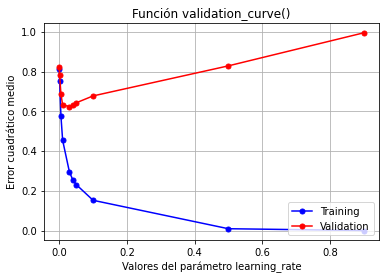

In [24]:
rango_learning_rate = [0.0001, 0.001, 0.005 ,0.01, 0.03, 0.04, 0.05, 0.1, 0.5, 0.9]

train_scores2, val_scores2 = validation_curve(estimator = mipipe,
                                              X = XtrainT,
                                              y = np.ravel(ytrainlog),
                                              cv = 5,
                                              param_name = "mod__learning_rate",
                                              param_range = rango_learning_rate,
                                              scoring = 'neg_mean_squared_error',  # error MSE
                                              n_jobs = -1)


train_mean2 = np.mean(-train_scores2, axis = 1)
valid_mean2 = np.mean(-val_scores2, axis = 1)

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_learning_rate , train_mean2, color = "blue", marker = 'o', markersize = 5, label = "Training")

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_learning_rate , valid_mean2, color = "red", marker = 'o', markersize = 5, label = "Validation")

plt.title("Función validation_curve()")
plt.xlabel("Valores del parámetro learning_rate")
plt.ylabel("Error cuadrático medio")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Para el `max_depth`:

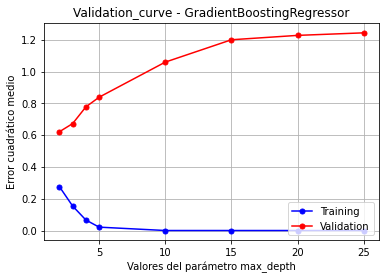

In [25]:
modelo_GB = ensemble.GradientBoostingRegressor()

mipipe = Pipeline(steps=[('ct',columnasTransformer),('mod', modelo_GB)])

rango_max_depth = [2, 3, 4, 5, 10, 15, 20, 25]

train_scores3, val_scores3 = validation_curve(estimator = mipipe,
                                              X = XtrainT,
                                              y = np.ravel(ytrainlog),
                                              cv = 5,
                                              param_name = "mod__max_depth",
                                              param_range = rango_max_depth,
                                              scoring = 'neg_mean_squared_error',  # error MSE
                                              n_jobs = -1)

train_mean3 = np.mean(-train_scores3, axis = 1)
valid_mean3 = np.mean(-val_scores3, axis = 1)

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_max_depth , train_mean3, color = "blue", marker = 'o', markersize = 5, label = "Training")

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_max_depth , valid_mean3, color = "red", marker = 'o', markersize = 5, label = "Validation")

plt.title("Validation_curve - GradientBoostingRegressor")
plt.xlabel("Valores del parámetro max_depth")
plt.ylabel("Error cuadrático medio")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

In [26]:
# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_XG = ensemble.GradientBoostingRegressor(max_depth = 3, learning_rate = 0.04)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

el_pipe = Pipeline(steps=[('ct',columnasTransformer),('mod', elmodelo_XG)])
el_pipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_XG = el_pipe.predict(Xtest)

print('Error RSME(Test) de XGBoost con tuning: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_XG)))

Error RSME(Test) de XGBoost con tuning: 0.680


In [27]:
modelo_XG_sin_hiper = ensemble.GradientBoostingRegressor()

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('mod_sin', modelo_XG_sin_hiper)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_XG = mipipe.predict(Xtest)

print('Error RSME(Test) de XGBoost default: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_XG)))

Error RSME(Test) de XGBoost default: 0.728


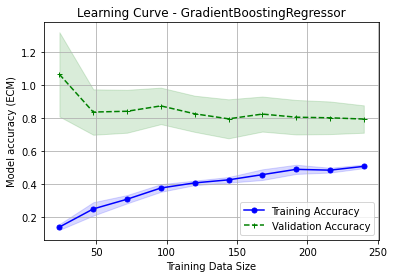

In [28]:
train_sizes, train_scores, val_scores = learning_curve(estimator=el_pipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - GradientBoostingRegressor')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy (ECM)')
plt.grid()
plt.legend(loc='lower right')

plt.show()

### b. Regresión de Vectores Soporte SVR

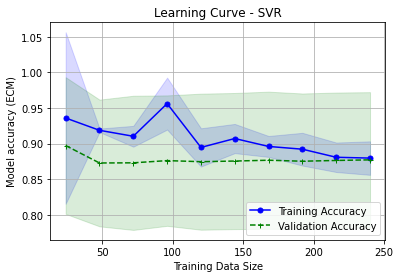

In [29]:
modelo_SVR = SVR(kernel="rbf")

mipipe = Pipeline(steps=[('ct',columnasTransformer),('mod', modelo_SVR)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - SVR')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy (ECM)')
plt.grid()
plt.legend(loc='lower right')

plt.show()

En este caso, se puede ver que el modelo con kernel de base radial y parámetros default, tiene buen conmportamiento con respecto a observar datos que no se usaron en el entrenamiento, PERO tiene sesgo grande pues no logra reducir demasiado al error cuadrático medio ni en los datos de entrenamiento ni en los de prueba. Veremos si cambiado algunos parámetros de complejidad se logra esto.

Para el `SVR`, se verá el efecto de `gamma` y el `C`. Dichos parámetros representan lo siguiente:

+ `gamma`: Coeficiente del kernel "rbf" (Radial Rasis Function a.k.a squared-exponential kernel)
+ `C`: Parámetro de regularización. Qué tan "fuerte" es la regularización es inversamente proporcional a C.

Empecemos con el hiperparámetro `gamma`:

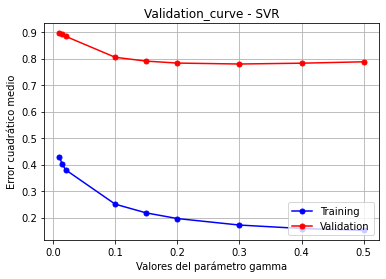

In [30]:
rango_gamma = [0.01, 0.015, 0.02, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]

train_scores2, val_scores2 = validation_curve(estimator = mipipe,
                                              X = XtrainT,
                                              y = np.ravel(ytrainlog),
                                              cv = 5,
                                              param_name = "mod__gamma",
                                              param_range = rango_gamma,
                                              scoring = 'neg_mean_squared_error',  # error MSE
                                              n_jobs = -1)


train_mean2 = np.mean(-train_scores2, axis = 1)
valid_mean2 = np.mean(-val_scores2, axis = 1)

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_gamma, train_mean2, color = "blue", marker = 'o', markersize = 5, label = "Training")

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_gamma, valid_mean2, color = "red", marker = 'o', markersize = 5, label = "Validation")

plt.title("Validation_curve - SVR")
plt.xlabel("Valores del parámetro gamma")
plt.ylabel("Error cuadrático medio")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Ahora veamos qué pasa con el hiperparámetro `C`:

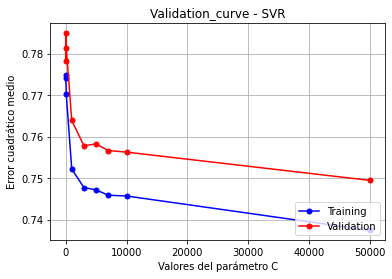

In [31]:
modelo_SVR = SVR(kernel="rbf")

mipipe = Pipeline(steps=[('ct',columnasTransformer),('mod', modelo_SVR)])

rango_C = [1, 10, 100, 1000, 3000, 5000, 7000, 10000, 50000]

train_scores3, val_scores3 = validation_curve(estimator = mipipe,
                                              X = XtrainT,
                                              y = np.ravel(ytrainlog),
                                              cv = 5,
                                              param_name = "mod__C",
                                              param_range = rango_C,
                                              scoring = 'neg_mean_squared_error',  # error MSE
                                              n_jobs = -1)


train_mean3 = np.mean(-train_scores3, axis = 1)
valid_mean3 = np.mean(-val_scores3, axis = 1)

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_C, train_mean3, color = "blue", marker = 'o', markersize = 5, label = "Training")

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_C, valid_mean3, color = "red", marker = 'o', markersize = 5, label = "Validation")

plt.title("Validation_curve - SVR")
plt.xlabel("Valores del parámetro C")
plt.ylabel("Error cuadrático medio")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

In [32]:
# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_SVR = SVR(kernel="rbf", gamma = 0.35, C = 7000)

# +++++++++++++ Termina sección de realizar ajustes +++++++++++++++++++++

el_pipe = Pipeline(steps=[('ct',columnasTransformer),('mod', elmodelo_SVR)])
el_pipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_SVR = el_pipe.predict(Xtest)

print('Error RSME(Test) de SVR con tuning: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVR)))

Error RSME(Test) de SVR con tuning: 0.885


In [33]:
# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

modelo_SVR_sin_hiper = SVR(kernel="rbf")

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('mod', modelo_SVR_sin_hiper)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_SVR = mipipe.predict(Xtest)

print('Error RSME(Test) de SVR default: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVR)))

Error RSME(Test) de SVR default: 0.935


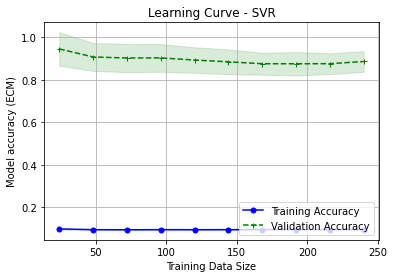

In [34]:
train_sizes, train_scores, val_scores = learning_curve(estimator=el_pipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - SVR')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy (ECM)')
plt.grid()
plt.legend(loc='lower right')

plt.show()

### c. Red Neuronal Perceptrón Multicapa MLP

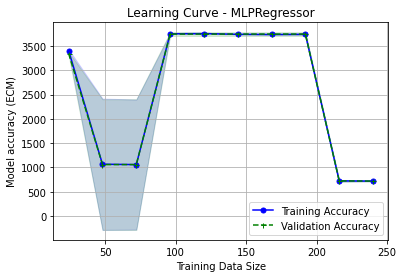

In [35]:
modelo_MLP = MLPRegressor(random_state = 1)

mipipe = Pipeline(steps=[('ct',columnasTransformer),('mod', modelo_MLP)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - MLPRegressor')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy (ECM)')
plt.grid()
plt.legend(loc='lower right')

plt.show()

Para el `MLPRegressor`, se verá el efecto de `alpha` y `batch_size`. Dichos parámetros representan lo siguiente:

+ `alpha`: Impacto del término de regularización L2. El término de regularización L2 se divide entre el tamaño de la muestra cuando se agrega a la pérdida.
+ `batch_size`: Tamaño de minilotes para optimizadores estocásticos.

Empecemos a ver el efecto en los errores cuando se varía `alpha`:

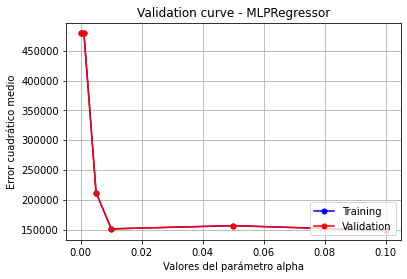

In [36]:
rango_alpha = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

train_scores2, val_scores2 = validation_curve(estimator = mipipe,
                                              X = XtrainT,
                                              y = np.ravel(ytrainlog),
                                              cv = 10,
                                              param_name = "mod__alpha",
                                              param_range = rango_alpha,
                                              scoring = 'neg_mean_squared_error',  # error MSE
                                              n_jobs = -1)


train_mean2 = np.mean(-train_scores2, axis = 1)
valid_mean2 = np.mean(-val_scores2, axis = 1)

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_alpha, train_mean2, color = "blue", marker = 'o', markersize = 5, label = "Training")

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_alpha, valid_mean2, color = "red", marker = 'o', markersize = 5, label = "Validation")

plt.title("Validation curve - MLPRegressor")
plt.xlabel("Valores del parámetro alpha")
plt.ylabel("Error cuadrático medio")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

Ahora, veamos cómo se comportan los errores como función del `batch_size`:

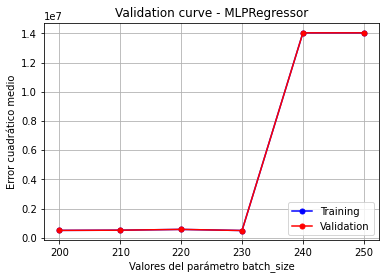

In [37]:
modelo_MLP = MLPRegressor(random_state = 1)

mipipe = Pipeline(steps=[('ct',columnasTransformer),('mod', modelo_MLP)])

rango_batch_size = [200, 210, 220, 230, 240, 250]

train_scores2, val_scores2 = validation_curve(estimator = mipipe,
                                              X = XtrainT,
                                              y = np.ravel(ytrainlog),
                                              cv = 5,
                                              param_name = "mod__batch_size",
                                              param_range = rango_batch_size,
                                              scoring = 'neg_mean_squared_error',  # error MSE
                                              n_jobs = -1)


train_mean2 = np.mean(-train_scores2, axis = 1)
valid_mean2 = np.mean(-val_scores2, axis = 1)

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_batch_size, train_mean2, color = "blue", marker = 'o', markersize = 5, label = "Training")

# Curva de entrenamiento con la métrica de error cuadrático medio
plt.plot(rango_batch_size, valid_mean2, color = "red", marker = 'o', markersize = 5, label = "Validation")

plt.title("Validation curve - MLPRegressor")
plt.xlabel("Valores del parámetro batch_size")
plt.ylabel("Error cuadrático medio")
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

In [38]:
# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_MLP = MLPRegressor(random_state = 1, batch_size = 230, alpha = 0.01)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

el_pipe = Pipeline(steps=[('ct',columnasTransformer),('mod', elmodelo_MLP)])
el_pipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_MLP = el_pipe.predict(Xtest)

print('Error RSME(Test) de MLP con tuning: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_MLP)))

Error RSME(Test) de MLP con tuning: 1.422


In [39]:
# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

modelo_sin_hiper = MLPRegressor(random_state = 1)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('mod', modelo_sin_hiper)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_MLP = mipipe.predict(Xtest)

print('Error RSME(Test) de MLP default: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_MLP)))

Error RSME(Test) de MLP default: 1.423


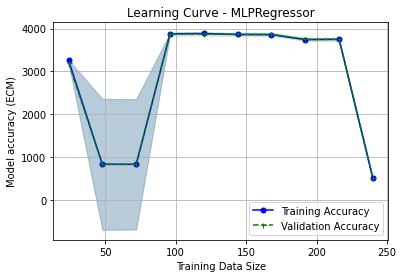

In [40]:
train_sizes, train_scores, val_scores = learning_curve(estimator=el_pipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - MLPRegressor')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy (ECM)')
plt.grid()
plt.legend(loc='lower right')

plt.show()

# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

+ Considero que los dos modelos basados en árboles son mejores en este contexto, pues el XGBoost con tuning tiene un error de 0.68 y el Random Forest con tuning uno de 0.698 (que son los menores de todos los modelos en consideración). En particular, el XGBoost tiene potencial de ser mejorado agregando datos en el proceso de entrenamiento.

+ El modelo de regresión `RandomForestRegressor` es bastante sensible al parámetro `ccp_alpha` que modula el grado de complejidad que se usa para el Minimal Cost-Complexity Pruning

+ Se puede observar que con algunos ajustes de los hiperparámetros del modelo de Random Forest se mejora el efecto de agregar observaciones al sub-ajuste, con respecto al modelo con parámetros default, pero no lo suficiente; pues sigue habiendo una separación que parece no disminuir.

+ Se puede observar que modificar el parámetro `gamma` en la Regresión de Soporte Vectorial no tiene beneficios potenciales en modular el sobre-entrenamiento o el sub-entrenamiento.

+ Como su nombre lo indica, el parámetro `C` en la Regresión de Soporte Vectorial sí tiene potencial para una reducción del error cuadrático medio y el equilibrio (sub/sobre)-entrenamiento.

+ Para el SVR con kernel de base radial, se puede observar que sólo modificando los parámetros `C` y `gamma` no se mejora el performance con respecto al modelo con el mismo kernel y especificaciones por default. Pues se alejaron las curvas de aprendizaje de entrenamiento y prueba.

+ En el `MLPRegressor`, tanto para el hiperparámetro `batch_size` como el `alpha`, los errores son muy grandes (sesgo grande), pero para las muestras de entrenamiento y prueba son casi idénticos (varianza baja).

+ La curva de aprendizaje del modelo MLP con parámetros default es la más errática de todas. No muestra un comportamiento con cierta tendencia. Aunque sí revela que el error de entrenamiento es casi siempre idéntico al error de prueba, aunque muy grande dicho error.


### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**